<a href="https://colab.research.google.com/github/Kalyanasundaram12/Housing-price-prediction/blob/main/DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn import decomposition

In [5]:
df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/housing.csv")

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.shape

(20640, 10)

In [9]:
df.dropna(subset=[cols for cols in df.columns], inplace=True)

In [10]:
df.shape

(20433, 10)

In [11]:
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

In [12]:
corr_df.head

<bound method NDFrame.head of        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0  

In [13]:
corr_df.corrwith(df['median_house_value'])

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

In [14]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']
type(Y)

pandas.core.series.Series

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4422a06550>]],
      dtype=object)

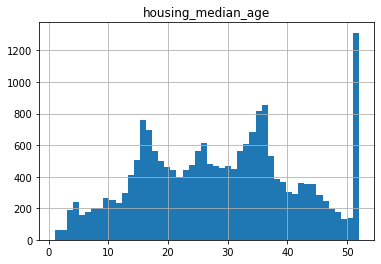

In [15]:
df.hist(column='housing_median_age', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4422415b80>]],
      dtype=object)

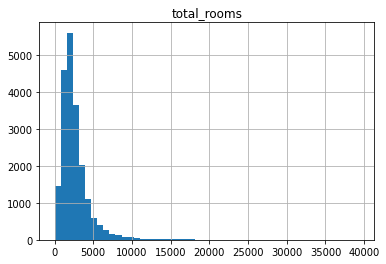

In [16]:
df.hist(column='total_rooms', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442237f2e0>]],
      dtype=object)

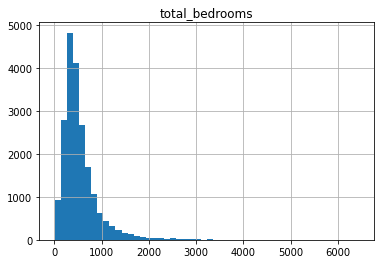

In [17]:
df.hist(column='total_bedrooms', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442226d070>]],
      dtype=object)

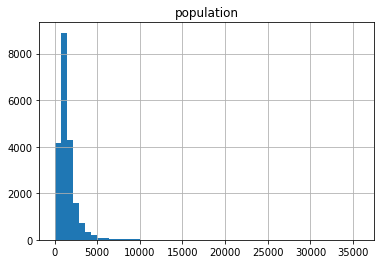

In [18]:
df.hist(column='population', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442226d4f0>]],
      dtype=object)

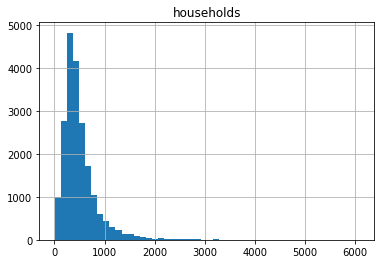

In [19]:
df.hist(column='households', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44220afa00>]],
      dtype=object)

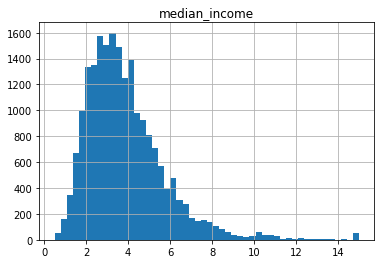

In [20]:
df.hist(column='median_income', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4421f93e50>]],
      dtype=object)

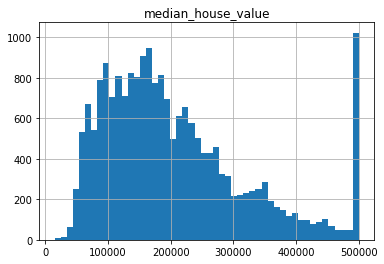

In [21]:
df.hist(column='median_house_value', bins=50)

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [41]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
Y_train
Y_test

array([[144600.],
       [152200.],
       [160900.],
       ...,
       [209800.],
       [123900.],
       [193800.]])

In [42]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1
scaler2

StandardScaler()

In [45]:
X_train = scaler1.fit_transform(X_train)
Y_train = scaler2.fit_transform(Y_train)


In [27]:
X_test = scaler1.transform(X_test)
Y_test = scaler2.transform(Y_test)

In [28]:
X_test

array([[-1.25684936,  0.95132719,  1.54697701, ..., -0.01870025,
         2.85396928, -0.38159499],
       [ 1.23461439, -1.28629925, -0.99533904, ..., -0.01870025,
        -0.3503892 , -0.38159499],
       [ 1.03449682, -0.82657726, -0.35976003, ..., -0.01870025,
        -0.3503892 , -0.38159499],
       ...,
       [ 0.19400302, -0.10884802, -1.31312855, ..., -0.01870025,
        -0.3503892 , -0.38159499],
       [ 0.84438513, -0.71868332,  0.59360849, ..., -0.01870025,
        -0.3503892 , -0.38159499],
       [ 0.58923522, -0.84065038,  0.03747685, ..., -0.01870025,
        -0.3503892 , -0.38159499]])

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(X_train, Y_train)

LinearRegression()

In [31]:
y_preds = reg.predict(X_test)

In [32]:
y_preds = scaler2.inverse_transform(y_preds)
y_preds

array([[195719.53920561],
       [240634.36498552],
       [140225.50124118],
       ...,
       [166107.39517556],
       [238881.9807786 ],
       [322151.36957278]])

In [33]:
pca = decomposition.PCA(n_components=2)
components = pca.fit_transform(X_train)

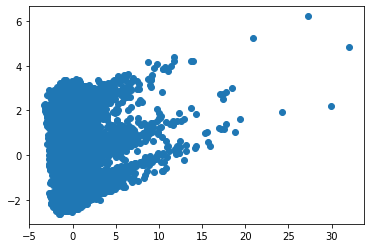

In [34]:
plt.scatter(components[:,0], components[:,1])

In [35]:
pca.explained_variance_ratio_

array([0.30067924, 0.1973541 ])

In [36]:
pca.singular_values_

array([236.44871895, 191.56154313])

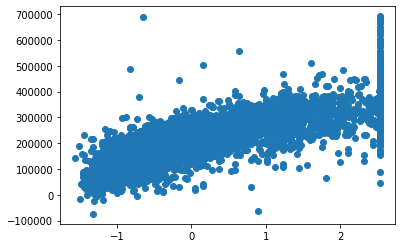

In [37]:
plt.scatter(Y_test, y_preds)

In [38]:
mean_absolute_percentage_error(Y_test, y_preds)

1875243.2659030273

In [39]:
mean_squared_error(Y_test, y_preds)

51250965298.68917

In [40]:
r2_score(Y_test, y_preds)

-51631076466.06113